In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from hypothesis_testing_soln import *

from z_test import z_test

# Hypothesis Testing Exercise

## Part 1: Analyzing Click Through Rate

 1.1)

In [2]:
nyt_ctr_df = pd.read_csv('data/nyt1.csv')

In [3]:
nyt_ctr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


1.2)

In [4]:
nyt_ctr_df['CTR'] = nyt_ctr_df.Clicks / nyt_ctr_df.Impressions


# Want to filter out any records with 0 impressioins
nyt_ctr_df = nyt_ctr_df[nyt_ctr_df.Impressions != 0].copy()


In [5]:
nyt_ctr_df.CTR.value_counts()

0.000000    415537
0.200000      6877
0.166667      6448
0.250000      5714
0.142857      5391
0.333333      3860
0.125000      3745
0.111111      2331
0.500000      1606
0.100000      1227
0.090909       595
0.285714       389
0.400000       360
1.000000       299
0.083333       270
0.222222       262
0.076923       129
0.666667        96
0.181818        72
0.071429        25
0.428571        24
0.153846        22
0.066667        20
0.375000        16
0.750000        10
0.300000        10
0.600000        10
0.272727         7
0.062500         5
0.571429         5
0.058824         4
0.214286         4
0.444444         2
0.133333         2
0.230769         1
Name: CTR, dtype: int64

In [6]:
nyt_ctr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455375 entries, 0 to 458440
Data columns (total 6 columns):
Age            455375 non-null int64
Gender         455375 non-null int64
Impressions    455375 non-null int64
Clicks         455375 non-null int64
Signed_In      455375 non-null int64
CTR            455375 non-null float64
dtypes: float64(1), int64(5)
memory usage: 24.3 MB


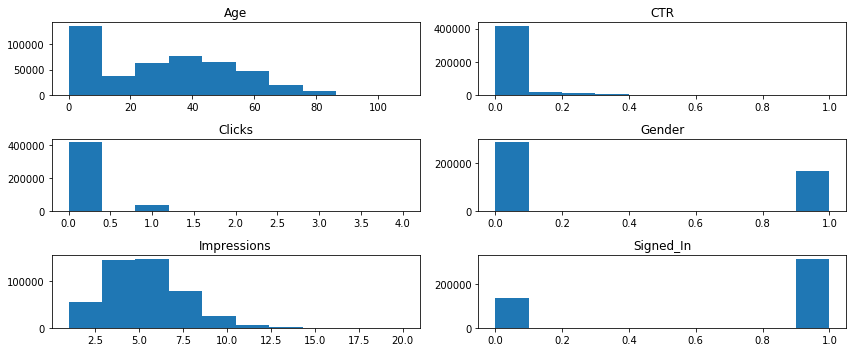

In [7]:
nyt_ctr_df.hist(figsize=(12, 5), grid=False)
plt.tight_layout()


1.5)

In [8]:

ctr_signed_in = nyt_ctr_df[nyt_ctr_df.Signed_In == 1].copy()
ctr_not_signed_in = nyt_ctr_df[nyt_ctr_df.Signed_In == 0].copy()

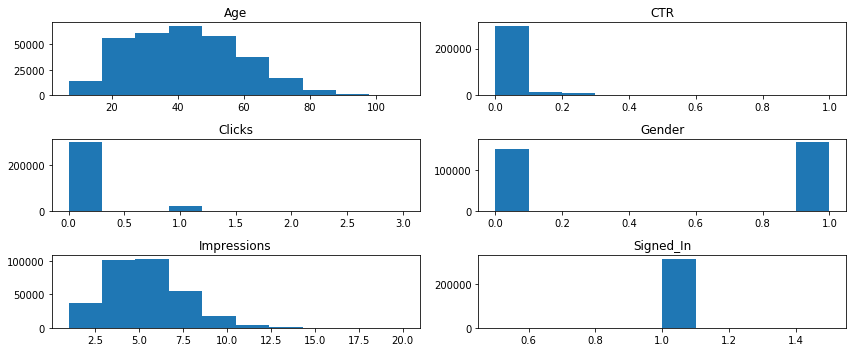

In [9]:
ctr_signed_in.hist(figsize=(12, 5), grid=False)
plt.tight_layout()

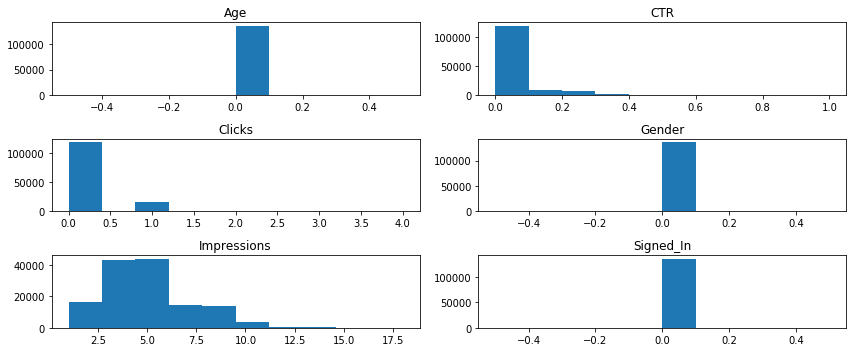

In [10]:
ctr_not_signed_in.hist(figsize=(12, 5), grid=False)
plt.tight_layout()

(<Figure size 864x360 with 6 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f62c668>)

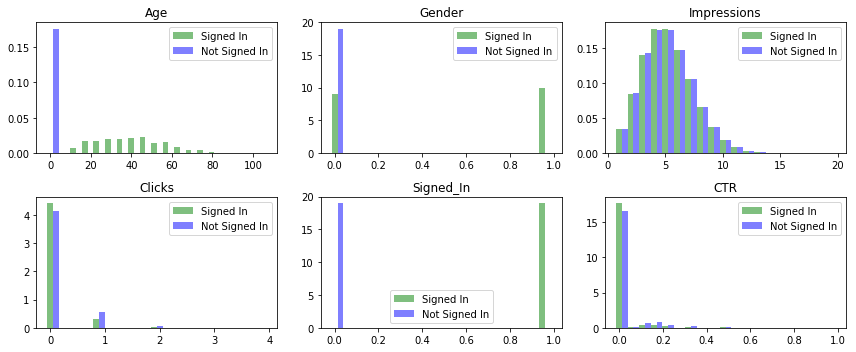

In [11]:
plot_subgroup_hist(nyt_ctr_df, ctr_signed_in, ctr_not_signed_in)

While there are fewer individuals _not_ logged in,
they actually appear to perhaps have a higher CTR
compared to those who _are_ logged in.    

    
    
    
1.6)

In [12]:
stat, p_val = stats.ttest_ind(ctr_signed_in.CTR, ctr_not_signed_in.CTR, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -55.37611793426087 
P-value: 0.0




   
1.8)

In [13]:
male_ctr = ctr_signed_in[ctr_signed_in.Gender == 1]['CTR']
female_ctr = ctr_signed_in[ctr_signed_in.Gender == 0]['CTR']

print('Male CTR: {}'.format(male_ctr.mean()))
print('Female CTR: {}'.format(female_ctr.mean()))

Male CTR: 0.01391852429759764
Female CTR: 0.014622012183866056


In [14]:
stat, p_val = stats.ttest_ind(male_ctr, female_ctr, equal_var=False)

print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: -3.289756065935106 
P-value: 0.0010028527313147612


1.9)

In [15]:
ctr_signed_in['age_groups'] = pd.cut(ctr_signed_in.Age, 
                                     [7, 18, 24, 34, 44, 54, 64, 1000], 
                                     include_lowest=True)

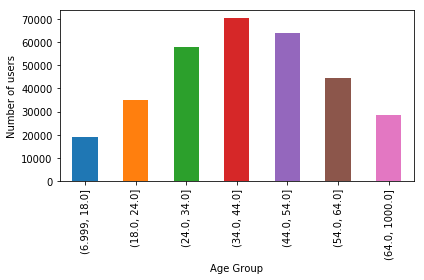

In [16]:
ctr_signed_in.age_groups.value_counts().sort_index().plot(kind='bar',grid=False)
plt.xlabel('Age Group')
plt.ylabel('Number of users')
plt.tight_layout()
plt.show()

In [17]:
alpha = .05
results = age_group_pairs(ctr_signed_in)

In [18]:
results[results['p_value'] < alpha].sort_values('absolute_mean_diff', ascending=False)

,first_age_group,second_age_group,first_group_mean,second_group_mean,mean_diff,absolute_mean_diff,p_value
9,"(64.0, 1000.0]","(18.0, 24.0]",0.029803,0.009720,0.020082,0.020082,1.918094e-300
7,"(64.0, 1000.0]","(44.0, 54.0]",0.029803,0.009958,0.019845,0.019845,0.000000e+00
6,"(64.0, 1000.0]","(24.0, 34.0]",0.029803,0.010146,0.019656,0.019656,0.000000e+00
0,"(34.0, 44.0]","(64.0, 1000.0]",0.010286,0.029803,-0.019516,0.019516,0.000000e+00
18,"(6.999, 18.0]","(18.0, 24.0]",0.026621,0.009720,0.016900,0.016900,1.614766e-189
15,"(44.0, 54.0]","(6.999, 18.0]",0.009958,0.026621,-0.016663,0.016663,7.660566e-254
12,"(24.0, 34.0]","(6.999, 18.0]",0.010146,0.026621,-0.016474,0.016474,7.660450e-233
3,"(34.0, 44.0]","(6.999, 18.0]",0.010286,0.026621,-0.016334,0.016334,2.732691e-248
20,"(18.0, 24.0]","(54.0, 64.0]",0.009720,0.020307,-0.010586,0.010586,9.745420e-121
17,"(44.0, 54.0]","(54.0, 64.0]",0.009958,0.020307,-0.010349,0.010349,2.525428e-171


In [19]:
results[results['p_value'] > alpha].sort_values('absolute_mean_diff', ascending=False)

,first_age_group,second_age_group,first_group_mean,second_group_mean,mean_diff,absolute_mean_diff,p_value
4,"(34.0, 44.0]","(18.0, 24.0]",0.010286,0.009720,0.000566,0.000566,0.089019
13,"(24.0, 34.0]","(18.0, 24.0]",0.010146,0.009720,0.000426,0.000426,0.214711
2,"(34.0, 44.0]","(44.0, 54.0]",0.010286,0.009958,0.000329,0.000329,0.234441
16,"(44.0, 54.0]","(18.0, 24.0]",0.009958,0.009720,0.000237,0.000237,0.476879
11,"(24.0, 34.0]","(44.0, 54.0]",0.010146,0.009958,0.000189,0.000189,0.514327
1,"(34.0, 44.0]","(24.0, 34.0]",0.010286,0.010146,0.000140,0.000140,0.624837


# Part 2: A / B Testing Landing Pages

Designers at Etsy have created a new landing page in an attempt to improve sign-up rate for local meetups.

The impact of a change is often measured using lift. Say the historic sign-up rate for the old landing page is 10%. An improvement in the sign-up rate to only 10.1%, while just a .1% absolute improvement, is a multiplicitive change of lift in conversion of 1%, this is a lift of 1%.

If the lift statistically significant, the new landing page would be considered a success (that's just how management works at Etsy apparantly). The product manager will not consider implementing the new page if the lift is not staistically significantly greater than or equal to 1%.

Your task is to determine if the new landing page provides a 1% or more lift to the sign-up rate. You are also given the understanding that there is a very different user base on weekends and an important amount of the revenue comes from those weekend users.

2.1)  Design an experiment in order to decide if the new page has a 1% lift in sign-up rate as compared to the old page? Describe in detail the data collection scheme you would use for the experiment. Justify why the data will be collected that way.

```
We have a historical expectation regarding the success rate of the old landing 
page; however, since there appear to be some caveats to page performance (e.g.,
weekend rates differ from weekday rates) it is best to compare the two
pages head to head, as opposed to just comparing the new page against the 10%
historical rate.  Therefore, we could randomly divert 50% of incoming users to 
the new page, and direct the other 50% of users to the old page. 

We need to be careful to not count users multiple times, as this would results in 
samples that are not independent samples but are *dependent* because they are from 
the same user. 

Approximately equal sized groups will allow us to commit equal resources towards 
learning about the effectiveness of each of the two landing pages. And sending users 
to both webpages at the same time allows us to account for the dependency of signup rates
on time and day of the week (as opposed to, e.g., testing one page on the weekend
and the other page on weekdays, which would be totally confounded by day of the
week!). We should keep in mind that it's possible for one landing page to be better on 
weekdays while the other is better on weekends since we have prior information that 
weekday and weekend populations are distinct. In light of this we might consider 
carrying out two tests -- one for weekdays and one for weekends -- and entertain the 
notion of different websites for the weekdays and weekends.  

Landing page assignment and sign-up result can be recorded for eventual testing.
We will plan to use a two sample z-test here since we will be comparing averages
and the number of samples will be quite large. Addressing the question of 1% lift 
(which is different from testing if the landing page sign-up rates are not equal)
is somewhat complicated (see parts 3 and 5 below).```

2.1) Why is it useful to report the change in conversion in terms of lift instead of absolute difference in conversion?   


```
Conversion lift provides a measure of relative improvement, as opposed to
absolute improvement.  When we do classical statistical hypothesis testing 
we are examining the statistical significance of *differences* between 
statistics in an absolute sense.  But not all differences of the same size
have the same *impact* on a business.  Lift on the other had shows you
improvement (or decline) relative to your current performance levels.
```

2.3) State your null hypothesis and alternative hypothesis. Is your alternative hypothesis set up for a one-tailed or two-tailed test? Explain your choice.

```
Initially, we might by default consider testing if the difference in 
sign-up rate proportions between the two landing pages is 0. I.e., the 
null hypothesis would be that there is no difference in landing page 
sign-up rates.  However, we can actually increase our power if we are 
willing to convert this two-tailed test into a one-tailed test. That is, 
we instead aim to rather test only that the *new* landing page is *better* 
than the old landing page, as opposed to that they are simply *different*.
If we do this we can extend our rejection region in one tail of the testing
distribution -- and ignore the other tail of the testing distribution -- while 
still maintaining the same overall Type I alpha significance level.  

But we can go even further than this. We are actually potentially interested in 
testing if we can observe a 1% lift in sign-up rate.  Based on our historical (10%) 
trends, we tentatively expect this to equate to an increase of 0.001 in the observed 
conversion rates.  So, we might propose the following hypotheses to actually examine
the statistical significance not of just (a) a difference and (b) an increase, but of 
the actual business question we have on hand. Thus, we might propose:  

- H0: new_conversion_rate - old_conversion_rate = 0.001
- H1: new_conversion_rate - old_conversion_rate > 0.001

These null and alternative hypothesis are the result of considering the two independent 
binomial samples (sign ups for old site and sign ups with new site) and the resulting
(independent and normally distributed) sampling distributions for the corresponding 
conversion proportions.  The null hypothesis here assumes there is exactly a 1% lift for 
the new landing page compared to the old landing page so that the expected value of the
difference between random variables of the two (normal) sampling distributions is 0.001.
(The distribution of the difference will also be a normal distribution since it is the
sum of two normal random variables).  The alternative hypothesis states that there is a
*greater* than 1% lift. 

Now, since the measured outcomes are binary, each user result can be modeled 
as a Bernoulli random variable and all together the entire collection of user
results for a given landing page make up a single Binomial sample.  Notice, howerver,
that by assuming a relationship between the proportions underlying the Bernoulli 
samples associated with each landing page (via the null hypothesis assumption) 
we are actually implicitly specifying that the mean of each individual Bernoulli 
sample is informative about the other and that the means (and hence the variances) 
*can be estimated jointly using all the data*.  I.e., if the conversion rate for the 
old landing page is $p_o$ and the conversion rate for the new landing page is $p_n$, 
then the variance of number of 
conversions out of $n_o$ visits for the old landing page can be estimated as 
$n_o((n_o(p_o+0.001) +  n_n p_n)/(n_o + n_n))(1-(n_o(p_o+0.001) +  n_n p_n)/(n_o + n_n))$ 
and the variance of the number of conversions out of $n_n$ visits for the new landing 
page can be estimated as 
$((n_op_o +  n_n(p_n-0.001))/(n_o + n_n))(1-(n_op_o +  n_n(p_n-0.001))/(n_o + n_n))/n_o$.
And correspondingly, the variance of the sampling proportions for each landing page are
$((n_o(p_o+0.001) +  n_n p_n)/(n_o + n_n))(1-(n_o(p_o+0.001) +  n_n p_n)/(n_o + n_n))/n_n$
and
$n_n((n_op_o +  n_n(p_n-0.001))/(n_o + n_n))(1-(n_op_o +  n_n(p_n-0.001))/(n_o + n_n))$,
respectively. 

Note that a simplified alternative to these standard error calculations is given in 
`z_test.py`. Actually, for equal sample sizes in the two groups
(and unequal sample sizes as well -- but it's easier to see for equal sample sizes) 
the simplification is _conservative_.  That is, it will overestimate -- not underestimate --
the standard error associated with the null hypothesis for testing purposes.
Thus, the simplification provides an easier calculation for the null hypothesis test at 
the cost of slightly reduced power. 

An alternative hypothesis construction and test -- namely, assuming the proportions are 
equal and not just testing for a "statistically significant increase", but instead
testing for a "statistically significant increase, after subtration of some offset" --
provides an alternative interpretation and rational to the problem at hand and the 
simplified standard error calculations therein.  We return to this alternative 
specification again in part 5 below. 
```

2.4) You ran a pilot experiment according to `Question 1` for ~1 day (Tuesday). The collected data is in `data/experiment.csv`. Import the data into a pandas dataframe. Check the data for duplicates and clean the data as appropriate.    



In [20]:
lp_experment_df = pd.read_csv('data/experiment.csv')

In [21]:
lp_experment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191148 entries, 0 to 191147
Data columns (total 5 columns):
user_id         191148 non-null int64
ts              191148 non-null float64
ab              191148 non-null object
landing_page    191148 non-null object
converted       191148 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.3+ MB


In [22]:
lp_experment_df.head()

,user_id,ts,ab,landing_page,converted
0,4040615247,1.356998e+09,treatment,new_page,0
1,4365389205,1.356998e+09,treatment,new_page,0
2,4256174578,1.356998e+09,treatment,new_page,0
3,8122359922,1.356998e+09,control,old_page,0
4,6077269891,1.356998e+09,control,old_page,0


In [23]:
lp_experment_df.ab.value_counts()

treatment    100333
control       90815
Name: ab, dtype: int64

In [24]:
lp_experment_df.landing_page.value_counts()

old_page    95574
new_page    95574
Name: landing_page, dtype: int64

There seems to be an issue with the page views.  We will want to remove any records where this seems to have happend

In [25]:
find_mismatch_on_row = lambda row: find_mismatch(row['ab'], row['landing_page'])
lp_experment_df['mismatch'] = lp_experment_df.apply(find_mismatch_on_row, axis=1)

In [26]:
print('Percent Mismatched: {:2.3}%'.format(
    (lp_experment_df.mismatch.sum()/lp_experment_df.shape[0])*100))

Percent Mismatched: 2.49%


In [27]:
clean_df = lp_experment_df[lp_experment_df.mismatch == 0].copy()

2.5)

In [28]:
old_conversion, old_nrow = calc_conversion_rate(clean_df, 'old')
new_conversion, new_nrow = calc_conversion_rate(clean_df, 'new')

In [29]:
old_conversion

0.09964212960414029

In [30]:
new_conversion

0.09968192186159416

In [31]:
z_score, p_val, reject = z_test(old_conversion, new_conversion, old_nrow, new_nrow,
           effect_size=0.001, alpha=.05)
print('p-value: {}'.format(p_val))

p-value: 0.7554458002288147


```
We assume the two proportions are equal, which allows us to 
estimate the conversion rate using the data from both pages together.  This provides 
estimates for the variances of the sampling distributions (which could be different
under our "equal proportions" null hypothesis if the group sizes are different). 
I.e., as seen in `pair_answers.py`, 
`z_score = (ctr_new - ctr_old - effect_size) / se` where
`se = sqrt(conversion * (1 - conversion) * (1 / nobs_old + 1 / nobs_new))`
with `conversion` being the overall conversion rate averaging across pages.

This `z_score` will be normally distributed provided the number of users 
used to estimate the sign-in rate proportions is large enough (to allow the 
Central Limit Theorem to kick in so that the distribution of the proportion
test statistics -- averages -- are normally distributed) so that the distribution of 
the difference then is just a difference of independent normally distributed 
random variables which is itself normally distributed.

A one-tailed test is used to examine if there is evidence of an 
increase in sign up rate for the new versus the old landing page at the 0.05 alpha 
significance level. However, the tested increase is not just "new beats old" but instead
(by virtue of the "effect size" handicap included in the z-score calculation) it is 
"new beats old by at least 0.001".  I.e., not only does the z-statistic have to pass
the "greater than 0" threshold in a statistically significant manner; it has to further
beat that threshold by an additional 0.001. A one-tailed test is appropriate here since 
we will only adopt the new page if the sign up rate is shown to be (statistically) 
significantly greater than the old page; otherwise, we will simply retain the old page.  

It turns out that our data indicates we should keep the _old_ page. The p-value (~0.76)
does not meet the 0.05 alpha significance level threshold, and so we cannot
reject the null hypothesis that the sign-up rate does not exceed a 0.001. 

A p-value is *the probability of observing a test statistic as or more extreme 
than what we saw in the data given the null hypothesis.  At at the 0.05 
significance level, even if the null hypothesis is true, there is a 5% chance 
that we may mistakenly reject it in favor of the alternative. 
```

2.6) Assume your test was insignificant. Given the setting of the experiment and the context of the problem, why might you be hesitant to make the conclusion to not use the new landing page. What would you do instead?

```
We know that (a) the user base may be different on the weekend, and (b) that 
sign-up rates are actually driven more by weekend users than weekday users. In 
A/B testing we often have to take into account other confounding factors that
may be influential in driving response and carefully weigh these into our 
analyses informing adoption of a new landing page.  Here, the landing 
page may work for weekend users, but not 'Tuesday' users.
```


2.7) Why might it be a problem if you keep evaluating the p-value as more data comes in and stop when the p-value is significant?

```
If the test is at some point going to be significant it seems intuitive to keep 
doing tests and watching results so that you can stop as soon as it becomes significant 
(and the improvement is "proven").  However, each time you do a classical statistical 
hypothesis test you have some chance of wrongly rejecting the null hypothesis.  By 
virtue of random chance a page may get a lucky string and CTR may appear to be improved, 
but given more  views it may "regress back to the mean" and return to unremarkable 
performance levels.  This is a form of the so-called "multiple testing problem". To avoid
this pitfall, a predefined number of views must be fixed (to achieve a desired
test power) and then the experiment must be carried out to completion, at which
point the hypothesis test is run (at the desired alpha significance threshold)
and the results evaluated. 
```

2.8) One perennial problem for A/B testing is when to stop your test. We will cover a more in-depth treatment of calculating statistical power of your experiment. One semi-quantitative way to assess if your conclusion is going to change if you have had run the experiment longer is to plot the progression of the p-value as a time series. If the p-value is consistent upon the collection of more data over an extended period of time, then you are more confident that your conclusion would stay the same even if the experiment had run on longer.

Plot the time series of the p-values using hourly intervals, such that the p-value at the second hour would be evaluating data up to second hour and at the third hour would be evaluating the data up to the third hour. Describe the insights you gain from the plot.

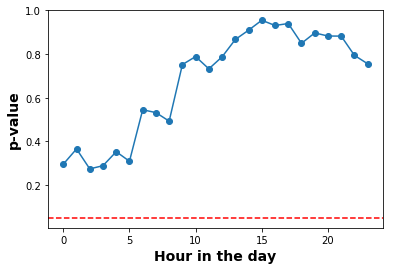

In [32]:
plot_pval(clean_df)
plt.show()

```
The p-values appear to be fairly volatile -- certainly they are not consistently 
trending below the 0.05 cutoff.  This is quite suggestive that indeed this hypothesis
test *would not* be expected to provide significance (and reject the null hypothesis) 
if we allowed it to run longer.  It is interesting to notice that at hour 15 the test
was marginally significant, but then the p-values increased returned to distinctly
non-significant levels.  This is exactly the type of problem that can happen if you
monitor p-values and then stop running your test when you see something "interesting".
```